<a href="https://colab.research.google.com/github/vasugupta9/DeepLearningProjects/blob/main/ConvolutionalNeuralNetworkVisualizer/ConvolutionalNeuralNetwork_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network Visualizer Model created using the functional api in keras for visualizing outputs from inner convolutional layers in a CNN architecture 

In [23]:
# importing required libraries 
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input # note vgg19 and VGG19 are not the same. VGG19 is used for instantiating the vgg19 model 
from tensorflow.keras.models import Model
import tensorflow as tf 

In [8]:
# Retrieve image from the web
url = "https://i.pinimg.com/originals/73/fd/d4/73fdd4752a176af8f388b31a67e93d87.jpg" 
response = requests.get(url)
with open("cool_cat.jpg", 'wb') as file :
  file.write(response.content)

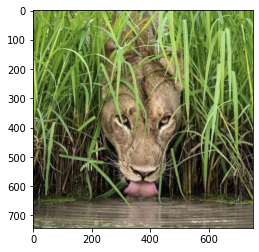

In [11]:
# Visualize the image 
img = cv2.imread("cool_cat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting from BGR to RGB format 
plt.imshow(img)
#plt.axis("off")
plt.show()

In [15]:
# loading VGG19 model 
model = VGG19(weights="imagenet")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# preprocessing input image before feeding to the VGG19 model 
img = cv2.resize(img, (224,224)) # resizing image to match shape of model input 
img = np.expand_dims(img, axis=0)
print(img.shape)
img = preprocess_input(img)

(1, 224, 224, 3)


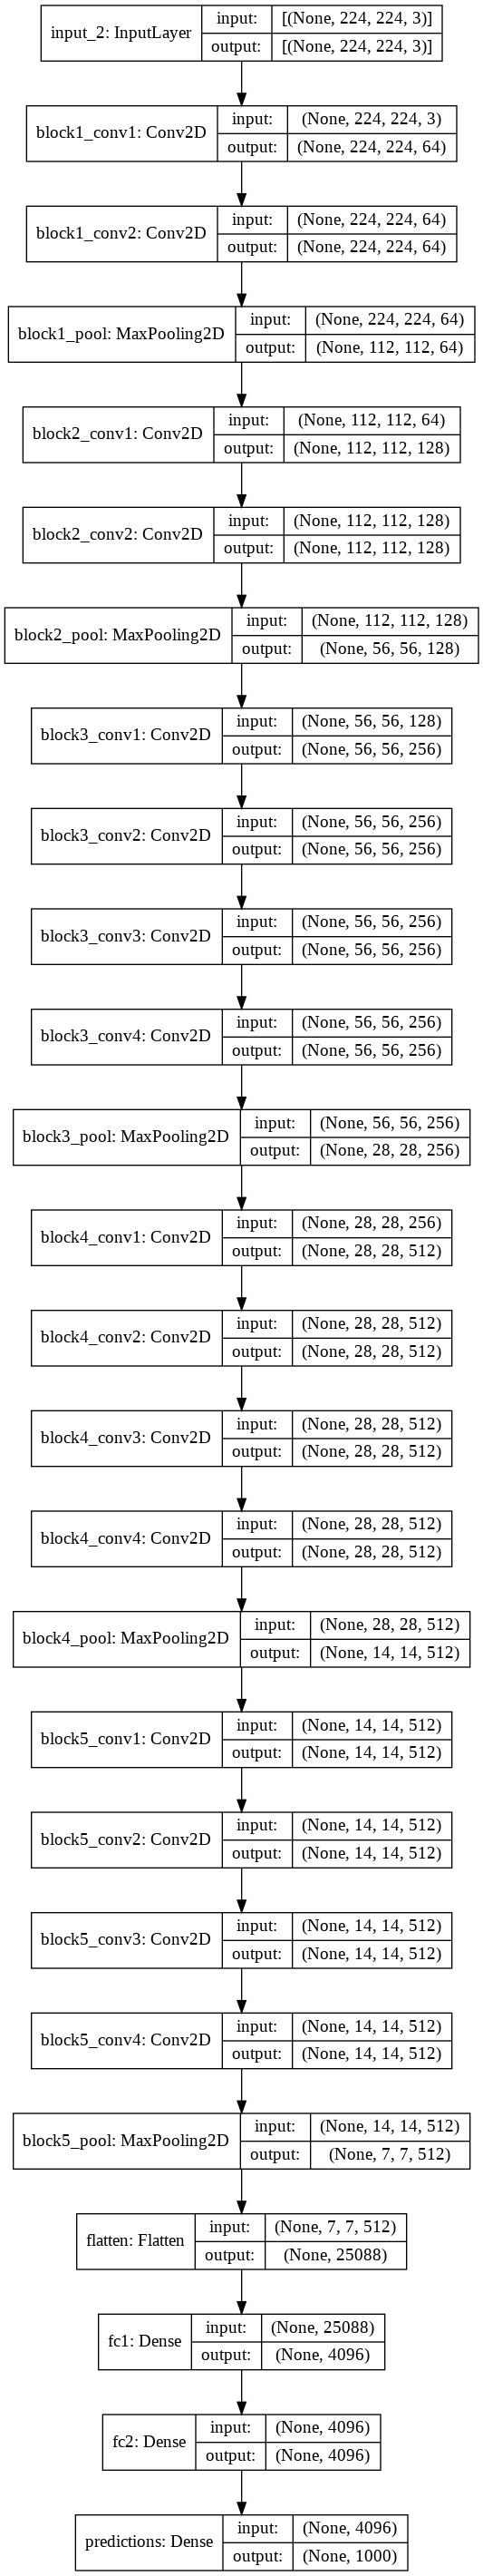

In [25]:
# defining new model with outputs as outputs from all layers of VGG19 model instantiated above 
layer_outputs = [layer.output for layer in model.layers]
model_all_layers = Model(inputs=model.input, outputs=layer_outputs)
tf.keras.utils.plot_model(model_all_layers, "temp.png", show_shapes=True)

In [27]:
# infering outputs from all layers on the 'cool_cats.jpg' image 
outputs_all_layers = model_all_layers(img) 
print(outputs_all_layers[1].shape)

(1, 224, 224, 64)


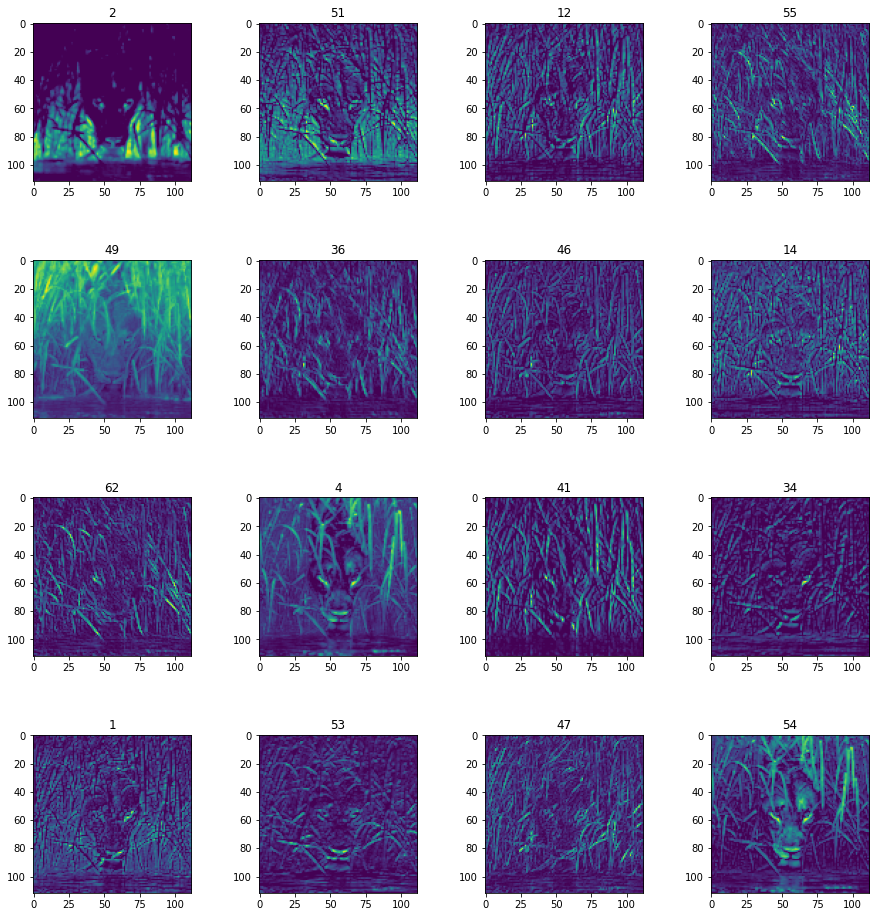

In [38]:
# Visualizing sample outputs from CNN layers
layer_index = 3
outputs = outputs_all_layers[layer_index][0]
num_channels = outputs.shape[-1]
num_displays = 16
#print(num_channels)
selected_channels = np.random.choice(np.arange(num_channels), size=(num_displays,), replace=False )
#print(selected_channels)

plt.figure(figsize=(16,16))
for i in range(len(selected_channels)) :
  plt.subplot(4,4,i+1)
  plt.title(selected_channels[i])
  plt.imshow(outputs[:,:,selected_channels[i]])
plt.subplots_adjust(wspace=0.05, hspace=0.5)
plt.show()
